<h1 align="center"><font color = "firebrick">Supervised ML - Classifications</h1>

A classification algorithm is a supervised learning technique that uses data training to determine data into different classes. Classification predictive modeling is trained using data or observations, and new observations are categorized into classes or groups.

Classification problems are those where we predict a class/label based on values in the independent variables. For example, looking at different vehicles on road, we can classify them into motorbikes, cars, trucks etc. Here, we may compare the vehicles based on their size, number of tires, occupancy etc to do the classification.

<img src = "https://www.simplilearn.com/ice9/free_resources_article_thumb/Regression_vs._Classification_1.png">

--------------------




In this notebook, we will learn different classification algorithms on a single dataset. This way, you can understand and compare various models' performances for the same data. There are some additional files too given to explore classification algorithms on different datasets for your practice.

# 1. Application

We have a dataset that contains three different varieties or species of Iris flower. These three species are as shown in the image:

<img src= "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width="600">


The dataset contains different dimensions of the petal and sepal of the three species. The last column of the data contains the class name or the species of the IRIS flower namely - Setosa, Virginica and Versicolor.

<img src= "https://www.mghassany.com/courses/MLcourse/img/iris.png" width="600">

**Aim:** We are required to develop and suggest the best machine learning algorithm to predict the class/target/label/species/variety of the flower if given the dimensions of its sepal and petal.

**Data source:** The dataset is built into scikit. We will cover how to access it below. You may also read: https://scikit-learn.org/stable/datasets/toy_dataset.html

# 1. Data import

### Loading the required libraries

In [ ]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

# Importing the sklearn modules to be used
import sklearn
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn import metrics # for checking the model accuracy
from sklearn import datasets

# We will import the ML classification algorithms when required in this notebook.

### Importing the data

In [ ]:
# Load in the data
df = datasets.load_iris(return_X_y=True, as_frame=True) # returns Iris flower dataset as a dataframe with X, y
df

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

In [ ]:
# Split y and X
labels = df[1] # y
df = df[0] # features dataframe

In [ ]:
# preview label data
labels

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [ ]:
# preview features data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Map numerical labels to species names
target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['variety'] = labels.map(target_names) # inserts a new column at the back after features

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<font color = "dark orange"> Please note that the **`variety`** has categorical values, not numerical and hence, it's a **classification** problem. <br>Even if we change the categorical values to numerical like 1, 2 and 3 still, those will be nominal values representing a categorical information.

# 3. Data Understanding

### Basic exploration


There are various methods to understand data. We are going to use some of those here.

In [ ]:
# Understanding data in different ways

print("Dimension of the data:", df.shape)

print("\n", "--" * 50, "\n")

print("Summary of the data\n")
display(df.info())

print("\n", "--" * 50, "\n")

print("Missing values in the entire dataframe\n")
display(df.isnull().sum().sum())

print("\n", "--" * 50, "\n")

print("Statistical description:")
display(df.describe())



Dimension of the data: (150, 5)

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   variety            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None


 ---------------------------------------------------------------------------------------------------- 

Missing values in the entire dataframe



0


 ---------------------------------------------------------------------------------------------------- 

Statistical description:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Exploring the target variable - `variety`


variety
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

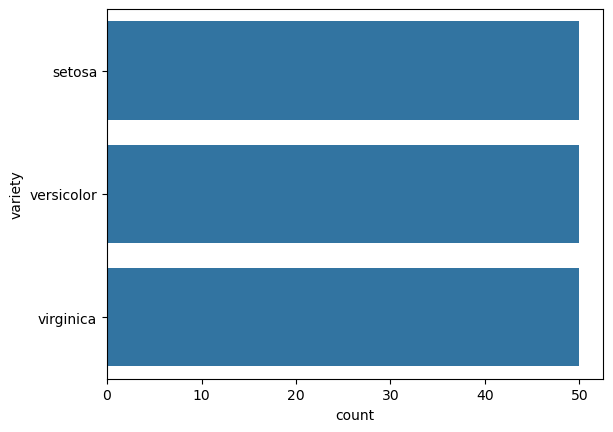

In [ ]:
display(df['variety'].value_counts())
sns.countplot(df["variety"]); # shows the count (frequency) of observations for each category

#### Observations from basic exploration:
1. There are total 150 records/rows and 5 columns in the dataset.
2. All independent variables have `float` values.
3. The `variety` column which is the target, has categorical/text data.
4. There is no missing value in any row/column. Hence, no need to treat the missing values.
5. There are three unique varieties of the IRIS flower having a count of 50 each in the dataset. This means we have total **3** classes to classify the new inputs in.

### Correlation analysis


In [ ]:
# Correlation matrix
corrmat = df.corr(numeric_only="True") # correlation value calculation only works with numbers

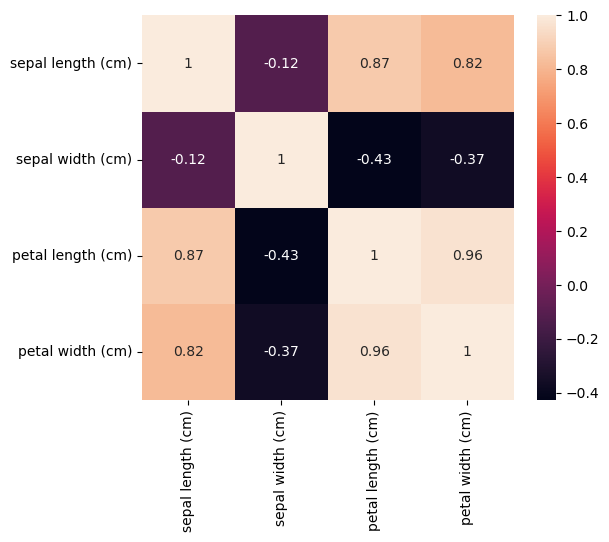

In [ ]:
# Let's plot the correlation matrix as a heatmap

plt.figure(figsize = (6,5))
sns.heatmap(corrmat, annot = True);

Although there are not too many columns and we can analyse the heatmap, let's just arrange the correlation matrix in a way that we see the correaltion values from highest to smallest.

Please note that the heatmap actually contains duplicate values i.e. the value on left diagonal are same as the value on right diagnonal. Hence, we will not include the duplicates from our next output.

<font color = "red"> **NOTE:** The last column contains categorical values and hence, it doesn't appear in the coorelation matrix. The coorelation matrix can help us understand how inter-correlation are the independent variables with each other.

    
#### Observation from correlation analysis:
- The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

# 4. Data Preparation

Data preparation is also called data cleaning, data transformation, data wrangling etc.

### Data Cleaning

A dirty data can contain a lot of issue and may srongly impact our data analysis and predictive modelling. It may contain incorrect, inconsistent, incomplete or duplicate data, or some other issues as well which should definitely be taken care of.

![image.png](attachment:image.png)


In our dataset, we do not have these issues. Later, while working on some other datasets, we will take care of these problems, if found.

Read more on why data cleaning is important: https://www.javatpoint.com/data-preparation-in-machine-learning

In [ ]:
# Selecting the predictors and target
X = df.drop('variety', axis = 1)  # taking all columns as input except Variety column
y = df['variety']   # taking only Variety column as the target

In [ ]:
# Verifying the features and target variables
display(X.head())
display(y.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: variety, dtype: object

### Splitting the data to train and test sets

Even though we are going to try different classification algorithms, we can use the same split as in all those models, the inputs and outputs are going to be the same.

<font color = "red"> **Then, how to decide the "best" model?**
    
Well, that depends on which model performs best on the performance metrics.

In [ ]:
# Importing the function/module to randomly split the data

from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify = y)

# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
# We have set the reproduceability using random_state
# stratify preserves label distribution between train-test splits

print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (112, 4)
Test Shape (38, 4)


In [ ]:
# Printing the total counts of unique values in the Y_train
print(y_train.value_counts())
print()  # printing a blank line for spacing
# Let's divide these values by 112 (total rows in training data) to get percentage.
print((y_train.value_counts() / 112) * 100)   # Multiply with 100 to get percentage
print()
# Printing the total counts of unique values in the Y_test
print(y_test.value_counts())
print()
# Let's divide these values by 38 (total rows in testing data) to get percentage.
print((y_test.value_counts() / 38) * 100)   # Multiply with 100 to get percentage

variety
virginica     38
versicolor    37
setosa        37
Name: count, dtype: int64

variety
virginica     33.928571
versicolor    33.035714
setosa        33.035714
Name: count, dtype: float64

variety
setosa        13
versicolor    13
virginica     12
Name: count, dtype: int64

variety
setosa        34.210526
versicolor    34.210526
virginica     31.578947
Name: count, dtype: float64


Getting a perfectly stratified data split is not normal. We have now done a better split where there is not much difference between the composition of 3 classes in training and testing.

Our data splits are now ready to go throught the models.

# 5. Data modelling

We will try these classification algorithms to classify the target variable (`variety`) based on all 4 independant variables.

Then, we will compare the accuracy from all those model to decide which one performs best.

The best performing model will be selected to classify IRIS varieties/species.

## <font color = "blue">5.1 Logistic Regression Classification

Logistic regression, despite its name, is a powerful statistical model used for **binary classification** tasks. It's designed to predict the probability of a data point belonging to a particular category, making it ideal for scenarios where the outcome is one of two possibilities (e.g., yes/no, true/false, pass/fail).

Unlike linear regression, which predicts continuous values, logistic regression produces probabilities that fall within the range of 0 to 1. To achieve this, it employs the **sigmoid function**, also known as the logistic function. This S-shaped curve takes any real-valued number and maps it to a value between 0 and 1.

Here's a simplified breakdown:

1.  **Linear Combination:**
    * Similar to linear regression, logistic regression starts by calculating a linear combination of the input features, along with their respective coefficients (weights).
2.  **Sigmoid Transformation:**
    * This linear combination is then passed through the sigmoid function. The sigmoid function's formula is:
        * `σ(z) = 1 / (1 + e^(-z))`
        * where `z` is the linear combination of the input features.
3.  **Probability Output:**
    * The output of the sigmoid function represents the predicted probability of the data point belonging to the positive class (e.g., 1).
4.  **Classification Threshold:**
    * To make a final classification decision, a threshold value (typically 0.5) is used. If the predicted probability is greater than the threshold, the data point is classified as belonging to the positive class; otherwise, it's classified as belonging to the negative class (e.g., 0).

In essence, logistic regression models the relationship between the input features and the probability of a binary outcome, using the sigmoid function to constrain the output within the desired probability range. This makes it a fundamental and widely used tool for various classification problems.

References to read/watch more about logistic regression:
1. https://www.ibm.com/topics/logistic-regression
2. https://builtin.com/machine-learning/logistic-regression-classification-algorithm
3. https://www.youtube.com/watch?v=yIYKR4sgzI8  (You can watch this video bby executing the below code cell as well).

In [ ]:
from IPython.display import HTML
HTML('<iframe width="700" height="400" src="https://www.youtube.com/embed/yIYKR4sgzI8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')

In [ ]:
# Importing the algorithms
from sklearn.linear_model import LogisticRegression

In [ ]:
# instantiating and training the model on training dataset,
# and making predictions for the testing data

log = LogisticRegression()

log.fit(X_train,y_train)

logPrediction = log.predict(X_test)

logAccuracy = metrics.accuracy_score(logPrediction,y_test)

print("The accuracy of logistic regression is:", logAccuracy*100, "%")

The accuracy of logistic regression is: 100.0 %


In the previous notebook, while working on regression, we saw how to print and explore the predicted values as well. You can do that as well if you want.

Our main focus here is to first train all the models and then compare their accuracies and performances.

## <font color = "blue">5.2 k-Nearest Neighbor (k-NN) Classification

K-Nearest Neighbors (KNN) is a simple yet effective algorithm used for both classification and regression tasks. Unlike many other machine learning models, KNN is a non-parametric and lazy learning algorithm.

Here's a breakdown of the core concepts:

**Core Idea:**

* KNN's fundamental principle is that similar data points tend to be close to each other. When you have a new, unlabeled data point, KNN predicts its label or value based on the labels or values of its "k" nearest neighbors in the training data.

**How it Works:**

1.  **Distance Calculation:**
    * When you want to predict the label for a new data point, KNN calculates the distance between that point and all other data points in the training set. Common distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance.
2.  **Finding the Nearest Neighbors:**
    * The algorithm then selects the "k" data points from the training set that are closest to the new data point based on the calculated distances.
3.  **Classification (for classification tasks):**
    * For classification, KNN determines the majority class among the "k" nearest neighbors. The new data point is then assigned the most frequent class label.
4.  **Regression (for regression tasks):**
    * For regression, KNN calculates the average (or median) of the target values of the "k" nearest neighbors. This average (or median) becomes the predicted value for the new data point.
5.  **Choosing "k":**
    * The value of "k" is a crucial parameter that significantly impacts the algorithm's performance.
    * A small "k" can lead to noisy predictions and overfitting, as the model becomes too sensitive to individual data points.
    * A large "k" can smooth out the decision boundaries but may lead to underfitting, as the model becomes less sensitive to local patterns.

**Key Characteristics:**

* **Non-parametric:** KNN doesn't make any assumptions about the underlying data distribution.
* **Lazy learning:** KNN doesn't build an explicit model during the training phase. It stores the training data and performs computations only when a prediction is needed.
* **Simple and intuitive:** KNN is easy to understand and implement.
* **Sensitive to data scaling:** The distance calculations are affected by the scale of the features, so it's often necessary to normalize or standardize the data.
* **Computationally expensive:** Calculating distances to all training data points can be time-consuming, especially for large datasets.


<img src = "https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F9cc3fc86-5e8f-4e73-b4ad-ae0061b10c2b_800x585.gif" width = "600">


Read more about KNN here:
1. https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning
2. https://www.youtube.com/watch?v=HVXime0nQeI

In [ ]:
# importing the model

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# we will take 3 neighbors to find a majority. Default is 5.

knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

KNNprediction=knn.predict(X_test)

knnAccuracy = metrics.accuracy_score(KNNprediction,y_test)

print("The accuracy of KNN model is:", knnAccuracy*100, "%")

The accuracy of KNN model is: 100.0 %


## <font color = "blue">5.3 Support Vector Machine

Support Vector Machines (SVMs) are a powerful and versatile supervised learning algorithm used for both classification and regression. They are particularly effective in high-dimensional spaces and are known for their ability to handle complex, non-linear data.

Here's a breakdown of the key concepts:

**Core Idea:**

* The fundamental goal of an SVM is to find the optimal hyperplane that best separates different classes within a dataset.
* A **hyperplane** in an n-dimensional space is an (n-1)-dimensional flat subspace that divides the space into two halves.
* "Optimal" in this context means maximizing the margin, which is the distance between the hyperplane and the closest data points from each class. These closest data points are called "support vectors."

**Key Concepts:**

* **Hyperplane:**
    * In a two-dimensional space, a hyperplane is a line. In higher dimensions, it becomes a plane or a higher-dimensional equivalent.
    * The hyperplane acts as the decision boundary, separating data points belonging to different classes.
* **Margin:**
    * The margin is the distance between the hyperplane and the nearest data points from each class (the support vectors).
    * SVM aims to maximize this margin, as a larger margin generally leads to better generalization and reduced risk of overfitting.
* **Support Vectors:**
    * These are the data points that lie closest to the hyperplane.
    * They play a crucial role in defining the position and orientation of the hyperplane.
* **Kernel Trick:**
    * One of the most powerful features of SVMs is their ability to handle non-linear data through the "kernel trick."
    * Kernel functions transform the input data into a higher-dimensional space, where it becomes linearly separable.
    * Common kernel functions include:
        * Linear kernel
        * Polynomial kernel
        * Radial basis function (RBF) kernel
* **Soft Margin:**
    * In real-world datasets, perfect linear separation is often not possible.
    * Soft margin SVMs allow for some misclassification by introducing slack variables.
    * This allows the algorithm to find a balance between maximizing the margin and minimizing the number of misclassified points.

**In essence:**

* SVMs seek to find the best possible boundary between different categories of data.
* They are particularly strong when data has many features, and when the relationship between those features and the categories is complex.
* The kernel trick gives them the ability to work in situations where a simple straight line, or plane, will not correctly divide the data.




<img src="https://vatsalparsaniya.github.io/ML_Knowledge/_images/gif.gif" width="500">


Read more about SVM here:
1. https://www.youtube.com/watch?v=efR1C6CvhmE
2. https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm
3. https://www.ibm.com/docs/en/spss-modeler/saas?topic=nodes-support-vector-machine-models
4. https://scikit-learn.org/stable/modules/svm.html

In [ ]:
# Support Vector Machine (SVM) Classifier Algorithm

from sklearn.svm import SVC

In [ ]:
svc=SVC()   # SVC stands for Support Vector Classifier

svc.fit(X_train,y_train)

svcPrediction=svc.predict(X_test)

svcAccuracy = metrics.accuracy_score(svcPrediction,y_test)

print("The accuracy of SVM model is:", svcAccuracy*100, "%")

The accuracy of SVM model is: 100.0 %


## <font color = "blue">5.4 Decision Tree Classifier

Decision trees are a powerful and intuitive supervised learning algorithm used for both classification and regression tasks. They work by recursively partitioning the data into subsets based on feature values, creating a tree-like structure that represents a series of decisions.

**Core Idea:**

* Decision trees aim to learn a set of rules from the features of the data to predict a target variable.
* The tree consists of nodes, branches, and leaves.
* * **Nodes:** Represent a test on a specific feature.
* * **Branches:** Represent the outcome of the test.
* * **Leaves:** Represent the predicted outcome (class label or value).

**How it Works:**

1.  **Root Node:**
    * The tree starts with a root node that contains the entire dataset.
2.  **Feature Selection and Splitting:**
    * The algorithm selects the best feature to split the data at each node.
    * The goal is to create subsets that are as pure as possible, meaning that they contain data points from mostly one class (for classification) or similar target values (for regression).
    * **Gini Impurity** is commonly used for classification tasks to determine the best split.
3.  **Recursive Partitioning:**
    * The data is split into subsets based on the selected feature and its values.
    * This process is repeated recursively for each subset, creating child nodes and branches.
4.  **Leaf Nodes:**
    * The process continues until a stopping criterion is met, such as:
        * All data points in a node belong to the same class.
        * A maximum tree depth is reached.
        * A minimum number of data points are present in a node.
5.  **Prediction:**
    * To make a prediction for a new data point, the algorithm traverses the tree from the root node to a leaf node, following the branches based on the feature values of the data point.
    * The leaf node's value then becomes the prediction.

**Gini Impurity and Node Splitting:**

* **Gini Impurity:**
    * Gini impurity measures the degree of impurity or randomness in a set of data points.
    * It's calculated as:
        * `Gini = 1 - Σ (p_i)^2`
        * where `p_i` is the proportion of data points in the set that belong to class `i`.
    * A Gini impurity of 0 indicates that all data points in the set belong to the same class (perfect purity).
    * A Gini impurity of 0.5 (for binary classification) indicates maximum impurity (equal proportions of both classes).
* **Node Splitting:**
    * When building a decision tree, the algorithm evaluates different features and their possible split points to find the split that minimizes Gini impurity.
    * For each potential split, the algorithm calculates the Gini impurity of the resulting subsets.
    * The split that results in the lowest weighted average Gini impurity is selected. This means that the algorithm is trying to create subsets that are as pure as possible after the split.
    * The weighted average is found by multiplying each child nodes gini impurity, by the proportion of data points that reside in that child node.
    * This process is repeated at each node, recursively building the tree.

**In essence:**

* Decision trees create a series of "if-then-else" rules that partition the data.
* Gini impurity is a metric that guides the algorithm in selecting the best feature and split point at each node, ensuring that the resulting subsets are as homogeneous as possible.


<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/Decision_Tree-2.png">

Read more about Decision Tree here:
1. https://www.ibm.com/topics/decision-trees
2. https://www.youtube.com/watch?v=_L39rN6gz7Y
3. https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm
4. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


### NB: Random Forests

A crucial point about Random Forests: they *don't* all have the same trees, and this is by design.

Even when trained on the same dataset and using the same Gini impurity splitting criterion, the trees within a Random Forest will differ due to two primary mechanisms:

1.  **Bootstrap Aggregating (Bagging):**
    * Random Forests use a technique called bagging. Bagging involves creating multiple subsets of the training data by sampling with replacement. This means that each tree is trained on a different, randomly selected subset of the original data.
    * Because sampling is done *with replacement*, some data points may appear multiple times in a subset, while others may not appear at all. This introduces variability in the training data for each tree.
    * This means each tree is exposed to a slightly different view of the data, forcing the trees to learn slightly different patterns.

2.  **Random Feature Subspace Selection (Feature Randomness):**
    * At each node of a tree, instead of considering all features for the best split (as in a standard decision tree), Random Forests randomly select a subset of features.
    * The algorithm then chooses the best split from *only* these randomly selected features.
    * This further introduces variability, as each tree is forced to consider different subsets of features for its splits.
    * This prevents strong features from dominating every tree, and forces the trees to consider less obvious, but still important, features.

**Why this Difference Matters:**

* **Reduced Variance:**
    * The variability introduced by bagging and feature randomness helps to reduce the variance of the model.
    * Decision trees are prone to overfitting, meaning they can learn the training data too well and perform poorly on unseen data.
    * By averaging the predictions of multiple diverse trees, Random Forests reduce the impact of individual trees that may have overfitted to specific subsets of the data.
* **Improved Generalization:**
    * The diversity of the trees allows the Random Forest to capture a wider range of patterns and relationships in the data.
    * This leads to better generalization performance, meaning the model is more likely to perform well on new, unseen data.

In short, even with the same dataset and splitting criterion, the random sampling of data and features ensures that each tree in a Random Forest is unique, leading to a more robust and accurate model.


In [ ]:
# import the model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

dtreePrediction = dtree.predict(X_test)

dtreeAccuracy = metrics.accuracy_score(y_true=y_test, y_pred=dtreePrediction)

print("The accuracy of decision tree classifier is:", dtreeAccuracy*100, "%")

The accuracy of decision tree classifier is: 97.36842105263158 %


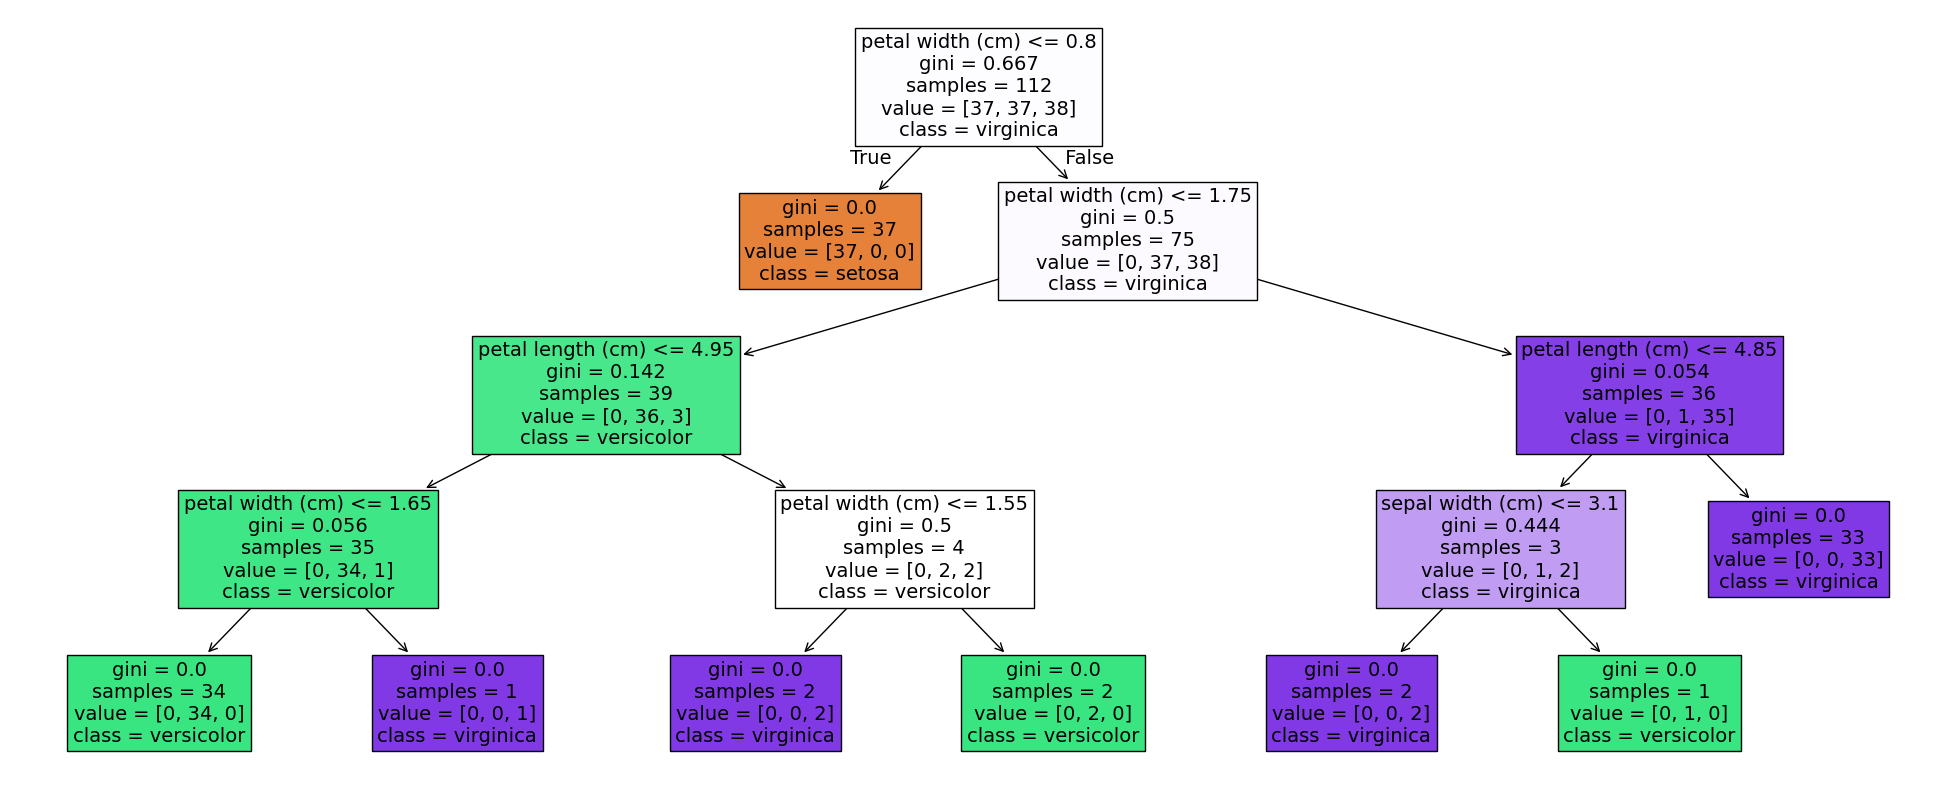

In [ ]:
# Visualize the tree
from sklearn import tree

plt.figure(figsize=(25,10))
dtree_plot = tree.plot_tree(dtree,
                           feature_names = X.columns,
                           class_names = y.unique(),
                           filled = True,
                           fontsize = 14)
plt.show()

# 6. Model Performance Evaluation

We have used 4 different models on the dataset to predict the IRIS variety given the dimensions of its sepal and petal.

Now, we will evaluate and compare the performance metrics to decide which model is the best for this type of classification of IRIS data.

We already have calculated the accuracy score for all 4 models. Let's bring them first.

#### Accuracy score

In [ ]:
print("The accuracy of logistic regression is:", logAccuracy*100, "%")
print("The accuracy of KNN model is:", knnAccuracy*100, "%")
print("The accuracy of SVM model is:", svcAccuracy*100, "%")
print("The accuracy of Decision Tree model is:", dtreeAccuracy*100, "%")

The accuracy of logistic regression is: 100.0 %
The accuracy of KNN model is: 100.0 %
The accuracy of SVM model is: 100.0 %
The accuracy of Decision Tree model is: 97.36842105263158 %


Based on accuracy of the model, it looks like all models except Decision Tree achieve perfect scores with 100% accuracy. Decision Tree's performance is also good considering the high accuracy score, so any of the models can be used further for predictions on new data.

**Accuracy** score is a **reliable** performance metric is the data is balanced. In our case too, the data is balanced so we can conclude that for the type of analysis we have done on the type of data, logistic regression, KNN classifier or SVM classifier - all three are suitable model.

<font color = "red"> **What if the data is not balanced? Should we rely on accuracy score?**
    
Actually, we have another very important performance metric which we use for classifiers and it can help especially when the data is imbalanced. It is called **confusion matrix**, which itself gives a lot of information about the classification done by the models.
    
    Let's work on it now.

#### Confusion Matrix and Classification Report

Confusion Matrix is a performance measurement for machine learning classification. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

We will first print the classification matrix and classification report for one model and then see how to interpret them.

In [ ]:
# We are going to understand this performance metric for the logistic regression model
logConf = metrics.confusion_matrix(y_test, logPrediction)
logConf

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 12]], dtype=int64)

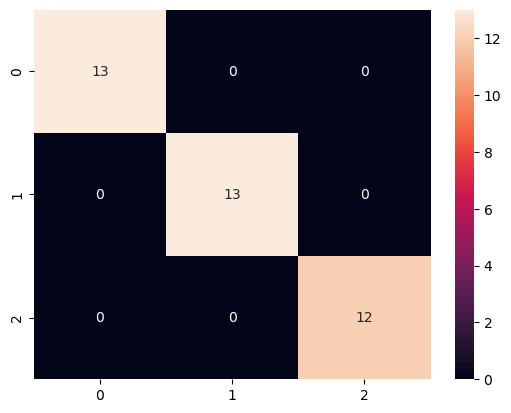

In [ ]:
# We can also visualise it in a heatmap
sns.heatmap(logConf, annot = True);

In [ ]:
# printing the classification report for logistic regression model
print(metrics.classification_report(y_test, logPrediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



#### <font color = "red"> How to interpret the Confusion Matrix and Classification Report?

<img src = "https://miro.medium.com/v2/resize:fit:0/1*3yGLac6F4mTENnj5dBNvNQ.jpeg" width="500" height="450">

<img src = "https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg" width="600" height="600">


The classification matrix and report for our logistic regression model indicate 100% accuracy. Therefore, based on this analysis, the model appears capable of accurately predicting the variety of the IRIS dataset using the four provided columns.

However, it's important to note that achieving perfect performance metrics, such as 100% accuracy, is often atypical, especially in real-world scenarios. This result is likely influenced by the limited size of the IRIS dataset and the small number of features used.

As you will observe in the supplemental reading materials, classification reports for more complex models and larger datasets typically do not yield perfect scores.

## <font color = "red"> **Exercise**

Write code to print the heatmap for confusion matrix of other 3 classifiers used.  Also, print the classification report as well for them and interpret the results.

In [ ]:
#From above

# We are going to understand this performance metric for the logistic regression model
treeConf = metrics.confusion_matrix(y_test, dtreePrediction)
treeConf

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 11]], dtype=int64)

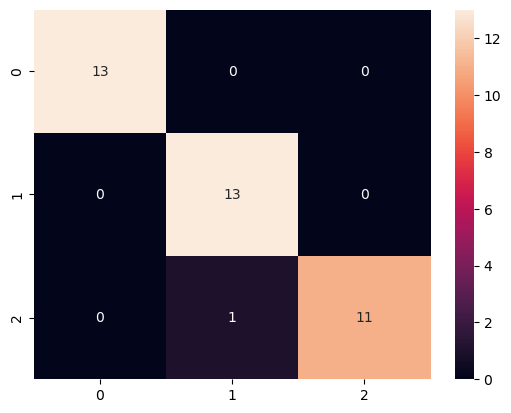

In [ ]:
# We can also visualise it in a heatmap
sns.heatmap(treeConf, annot = True);

In [ ]:
# printing the classification report for logistic regression model
print(metrics.classification_report(y_test, dtreePrediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

